<div style="color:white;
            display:fill;
            border-radius:15px;
            background-color:skyblue;
            font-size:100%;
            font-family:Verdana;
            letter-spacing:1px">
    <h2 style='padding: 20px;
              color:black;
              text-align:center;'>
        LOAN ELIGIBLE PREDICTION
    </h2>
    </div>

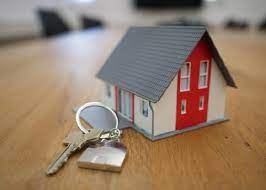

# Necessary Steps followed for Model Building

###  Importing Necessary Libraries

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

# 'Scikit-learn' (sklearn)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import (chi2,chi2_contingency)

# Algorithm used to build ML Model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

###  Loading the Dataset

In [308]:
df=pd.read_csv('loan_train.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [309]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [310]:
df.shape

(614, 13)

In [311]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [312]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


### EDA [Exploratory Data Analysis]

#### Checking for Unique values

In [313]:
for i in df.columns:
    print("Feature Name = ",i)
    print(df[i].unique(),'\n')
    print(i,'------->',df[i].nunique(),'\n')

Feature Name =  Loan_ID
['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP0

In [314]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

#### Checking null values

In [315]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [316]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [317]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

#### Treating Null-Values

In [318]:
for i in df.columns:
    df[i]=df[i].fillna(df[i].mode()[0])

In [319]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Checking for Duplicates

In [320]:
df[df.duplicated()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [321]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


##  Categorical Variable 

### Gender

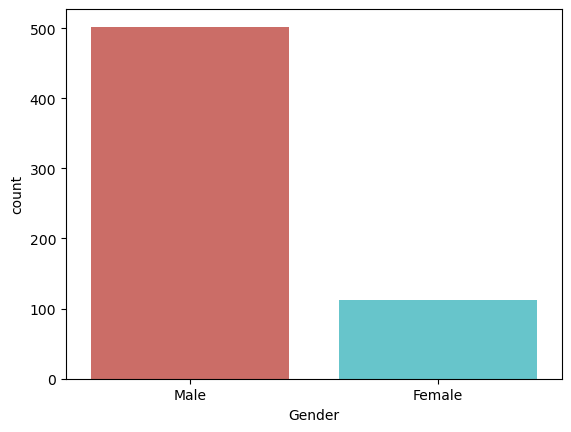

Male      502
Female    112
Name: Gender, dtype: int64

In [322]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()
df.Gender.value_counts()

### Married

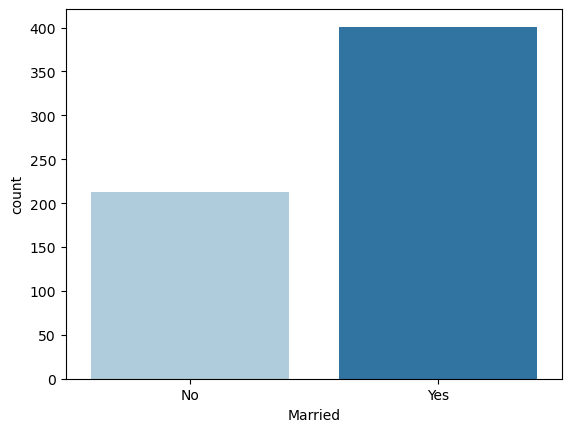

Yes    401
No     213
Name: Married, dtype: int64

In [323]:
sns.countplot(x="Married", data=df, palette="Paired")
plt.show()
df.Married.value_counts()

### Education

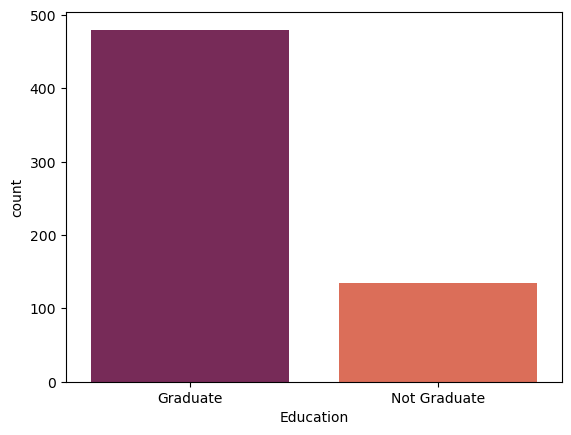

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [324]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()
df.Education.value_counts()

### Self_Employed

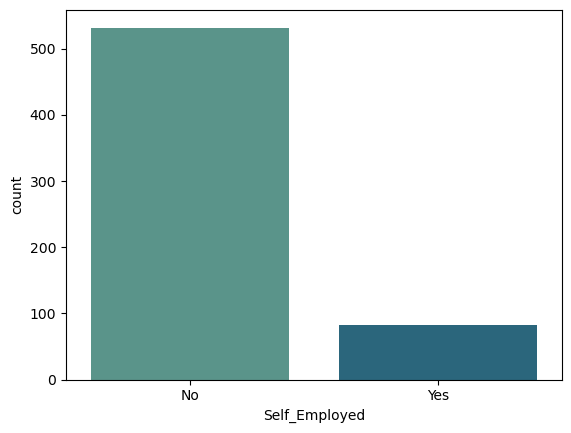

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [325]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()
df.Self_Employed.value_counts()

### Credit_History

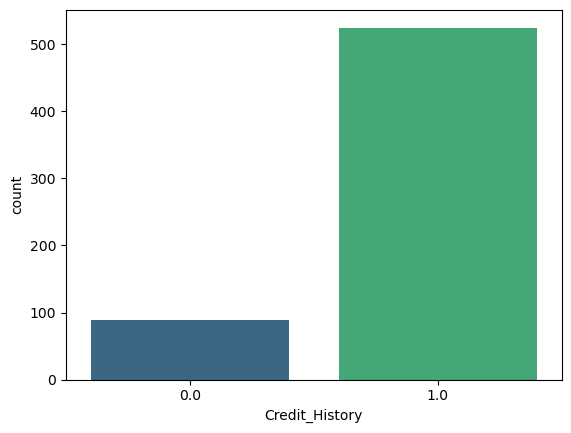

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [326]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()
df.Credit_History.value_counts()

### Property_Area

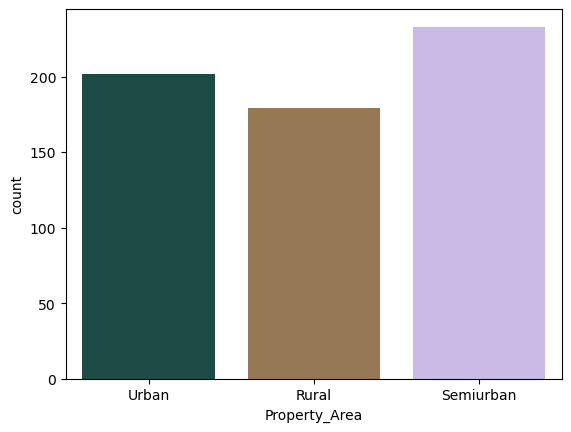

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [327]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()
df.Property_Area.value_counts()

### Loan_Status

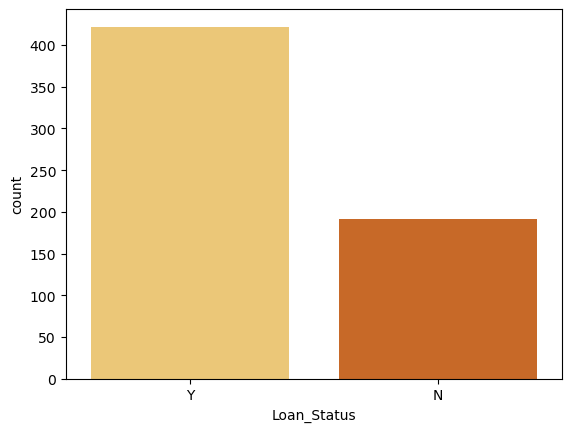

Y    422
N    192
Name: Loan_Status, dtype: int64

In [328]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()
df.Loan_Status.value_counts()

### Loan_Amount_Term

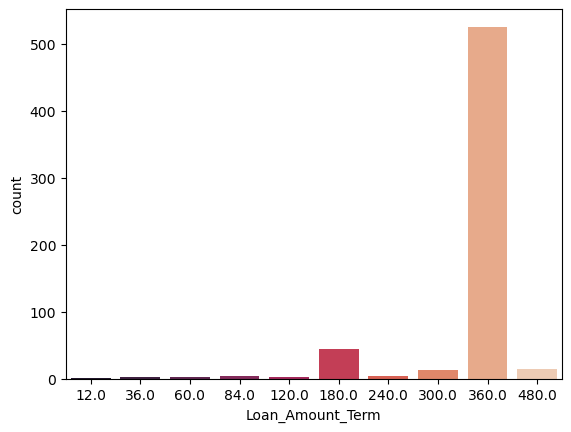

In [329]:
sns.countplot(x="Loan_Amount_Term", data=df, palette="rocket")
plt.show()


# Feature Selection Technique

In [330]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [331]:
df.Gender = df.Gender.map({'Male':1,'Female':2})

In [332]:
df.Education = df.Education.map({'Graduate':1,'Not Graduate':2})

In [333]:
df.Self_Employed = df.Self_Employed.map({'Yes':1,'No':2})

In [334]:
df.Married = df.Married.map({'Yes':1,'No':2})

In [335]:
df.Property_Area = df.Property_Area.map({'Urban':1,'Rural':2, 'Semiurban':3})

In [336]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,2,0,1,2,5849,0.0,120.0,360.0,1.0,1,Y
1,LP001003,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,2,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
3,LP001006,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,1,Y
4,LP001008,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,2,2,0,1,2,2900,0.0,71.0,360.0,1.0,2,Y
610,LP002979,1,1,3+,1,2,4106,0.0,40.0,180.0,1.0,2,Y
611,LP002983,1,1,1,1,2,8072,240.0,253.0,360.0,1.0,1,Y
612,LP002984,1,1,2,1,2,7583,0.0,187.0,360.0,1.0,1,Y


In [337]:
df = df.drop("Loan_ID", axis = 1)

In [338]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,2,0,1,2,5849,0.0,120.0,360.0,1.0,1,Y
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,2,N
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,Y
3,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,1,Y
4,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,2,2,0,1,2,2900,0.0,71.0,360.0,1.0,2,Y
610,1,1,3+,1,2,4106,0.0,40.0,180.0,1.0,2,Y
611,1,1,1,1,2,8072,240.0,253.0,360.0,1.0,1,Y
612,1,1,2,1,2,7583,0.0,187.0,360.0,1.0,1,Y


In [339]:
df.Loan_Status = df.Loan_Status.map({'Y':1,'N':0})

In [340]:
df['Dependents'] = df['Dependents'].replace('3+', '3')

In [341]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [342]:
X=df.drop(['Loan_Status'],axis=1)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,2,0,1,2,5849,0.0,120.0,360.0,1.0,1
1,1,1,1,1,2,4583,1508.0,128.0,360.0,1.0,2
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1
3,1,1,0,2,2,2583,2358.0,120.0,360.0,1.0,1
4,1,2,0,1,2,6000,0.0,141.0,360.0,1.0,1


In [343]:
y = df['Loan_Status']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

Feature Importances:
Gender: 0.015639296176569978
Married: 0.024758271645938353
Dependents: 0.03954521487376532
Education: 0.02170817719658888
Self_Employed: 0.016608115891592178
ApplicantIncome: 0.22534576131108014
CoapplicantIncome: 0.11532506028361506
LoanAmount: 0.17415655678193676
Loan_Amount_Term: 0.040719917163911
Credit_History: 0.2894317830657138
Property_Area: 0.036761845609288545


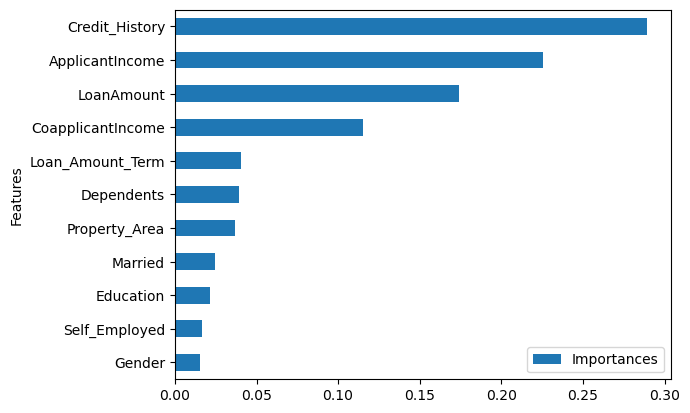

In [344]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(X, y)

# Get the feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Print the feature importances
print("Feature Importances:")
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")

# Creating a dataframe for visualization
final_df = pd.DataFrame({'Features':feature_names,"Importances":importances})
final_df.set_index('Features',inplace=True)
sorted_importances = final_df.sort_values(by = 'Importances')
sorted_importances.plot(kind='barh')
plt.show()

In [345]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,roc_auc_score

In [346]:
X = df[['Credit_History', 'ApplicantIncome', 'LoanAmount', 'ApplicantIncome']]
y = df['Loan_Status']

In [347]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [348]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [349]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=9)

In [350]:
df['Dependents'] = df['Dependents'].astype(int)

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int32(1), int64(7)
memory usage: 55.3 KB


In [352]:
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [353]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [354]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

In [355]:
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.45      0.60       127
           1       0.81      0.98      0.89       302

    accuracy                           0.83       429
   macro avg       0.86      0.72      0.75       429
weighted avg       0.84      0.83      0.80       429

[[ 57  70]
 [  5 297]]


In [356]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.38      0.54        65
           1       0.75      0.98      0.85       120

    accuracy                           0.77       185
   macro avg       0.84      0.68      0.70       185
weighted avg       0.81      0.77      0.74       185

[[ 25  40]
 [  2 118]]


# Decision Tree

In [357]:
from sklearn.tree import DecisionTreeClassifier

In [358]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

model1=DecisionTreeClassifier(random_state=42)
model1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [359]:
X.columns.to_list()

['Credit_History', 'ApplicantIncome', 'LoanAmount', 'ApplicantIncome']

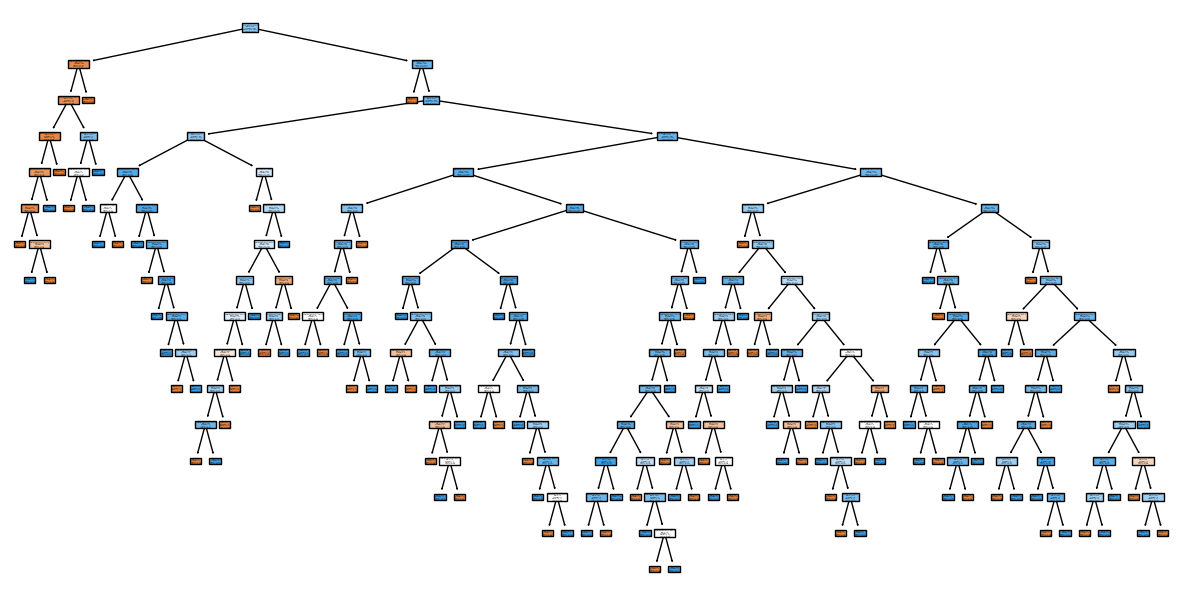

In [360]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7.5))
plot_tree(model1,filled=True,class_names=['No HD','Yes HD'],feature_names=X.columns.to_list())
plt.show()

In [361]:
import matplotlib.pyplot as plt

plt.figure(figsize=(150, 75))
plot_tree(model1, filled=True, class_names=['No HD', 'Yes HD'], feature_names=X.columns.to_list())
plt.show()
plt.savefig('image')

<Figure size 640x480 with 0 Axes>

In [362]:
train_score = model1.score(X_train,y_train)
test_score = model1.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 1.0, Testing Score 0.68


In [363]:
ytrain_pred = model1.predict(X_train)
ytest_pred = model1.predict(X_test)

In [364]:
confusion_matrix(y_train,ytrain_pred)

array([[138,   0],
       [  0, 322]], dtype=int64)

In [365]:
confusion_matrix(y_test,ytest_pred)

array([[24, 30],
       [19, 81]], dtype=int64)

In [366]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       322

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460



In [367]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.56      0.44      0.49        54
           1       0.73      0.81      0.77       100

    accuracy                           0.68       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.67      0.68      0.67       154



In [368]:
path=model1.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas= path.ccp_alphas 
ccp_alphas = ccp_alphas[:-1] 

In [369]:
models =[] 
for i in ccp_alphas:
    model2=DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    model2.fit(X_train,y_train)
    models.append(model2)

In [370]:
models

[DecisionTreeClassifier(random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0013526570048309182, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0014492753623188406, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0014492753623188406, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0015527950310559012, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0016304347826086956, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0016304347826086956, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0016304347826086956, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0018115942028985505, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0018115942028985507, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0018633540372670811, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.001870122630992196, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0018840579710144932, random_state=0),
 DecisionTreeClassifier(ccp_alpha=0.0019021739130434783, random_state=0)

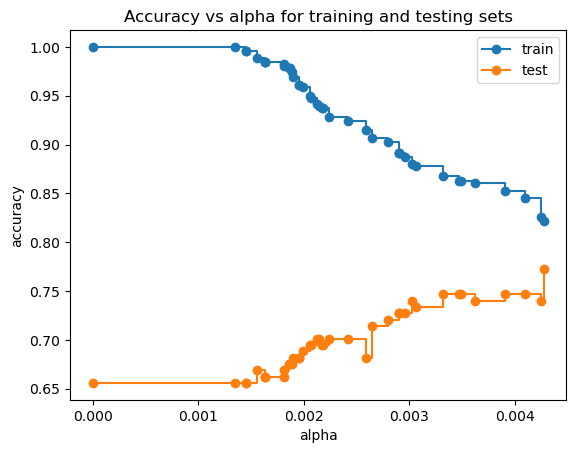

In [371]:
train_scores=[model.score(X_train,y_train) for model in models]
test_scores=[model.score(X_test,y_test) for model in models]

fig,ax=plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores,marker='o',label='train',drawstyle='steps-post')
ax.plot(ccp_alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
ax.legend()
plt.show()

In [372]:
model3 = DecisionTreeClassifier(random_state=42,ccp_alpha=0.0048)

In [373]:
model3.fit(X_train,y_train)
train_score = model3.score(X_train,y_train)
test_score = model3.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.82, Testing Score 0.77


In [374]:
from sklearn.model_selection import cross_val_score

<Axes: xlabel='tree'>

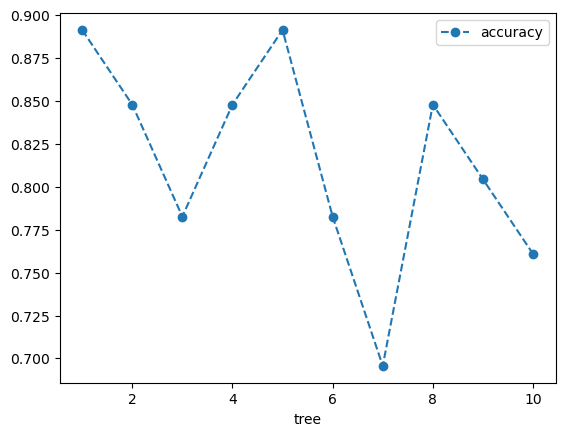

In [375]:
scores=cross_val_score(model3,X_train,y_train,cv=10)
df=pd.DataFrame(data={'tree':range(1,11),'accuracy':scores})

df.plot(x='tree',y='accuracy',marker='o',linestyle='--')

In [376]:
ccp_alphas

array([0.        , 0.00135266, 0.00144928, 0.00144928, 0.0015528 ,
       0.00163043, 0.00163043, 0.00163043, 0.00181159, 0.00181159,
       0.00186335, 0.00187012, 0.00188406, 0.00190217, 0.00195652,
       0.00195652, 0.00199275, 0.0020595 , 0.00207039, 0.00212879,
       0.00214803, 0.00217391, 0.00218028, 0.00224379, 0.00241546,
       0.00258799, 0.00264878, 0.00279533, 0.00289855, 0.00289855,
       0.00289855, 0.00296038, 0.0030303 , 0.00306159, 0.00332268,
       0.00346772, 0.00348756, 0.00362319, 0.00390907, 0.00409505,
       0.00424883, 0.00427489])

In [377]:
alpha_loop_values=[]
for i in ccp_alphas:
    model4=DecisionTreeClassifier(random_state=0,ccp_alpha=i)
    scores=cross_val_score(model4,X_train,y_train,cv=5)
    alpha_loop_values.append([i,np.mean(scores),np.std(scores)])

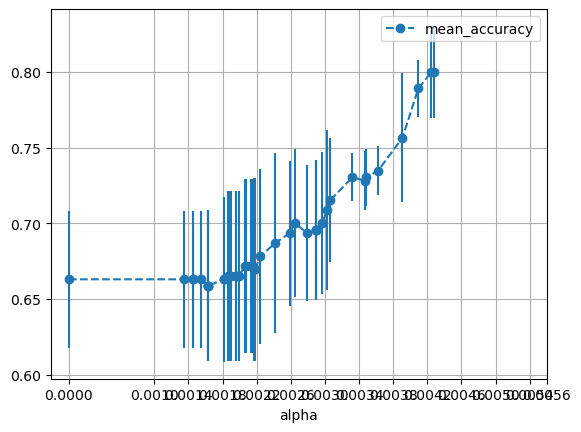

In [378]:
alpha_results = pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')
plt.xticks([0.0, 0.001, 0.0014, 0.0018, 0.0022, 0.0026, 0.003, 0.0034,0.0038,0.0042,0.0046, 0.005, 0.0054,0.0056])
plt.grid()
plt.show()

In [379]:
alpha_results[(alpha_results['alpha']>0.0018) & (alpha_results['alpha']<0.00183)]

,alpha,mean_accuracy,std
8,0.001812,0.663043,0.054565
9,0.001812,0.663043,0.054565


In [380]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha']>0.0018) & (alpha_results['alpha']<0.00183)]['alpha']
ideal_ccp_alpha

8    0.001812
9    0.001812
Name: alpha, dtype: float64

In [381]:
ideal_ccp_alpha.values

array([0.00181159, 0.00181159])

In [382]:
model5=DecisionTreeClassifier(random_state=42,ccp_alpha= 0.015419)

In [383]:
model5.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.015419, random_state=42)

In [384]:
ytrain_pred = model5.predict(X_train)
ytest_pred = model5.predict(X_test)

In [385]:
train_score = model5.score(X_train,y_train)
test_score = model5.score(X_test,y_test)
print(f'Training Score {round(train_score,2)}, Testing Score {round(test_score,2)}')

Training Score 0.82, Testing Score 0.77


In [386]:
confusion_matrix(y_train,ytrain_pred)

array([[ 61,  77],
       [  5, 317]], dtype=int64)

In [387]:
confusion_matrix(y_test,ytest_pred)

array([[21, 33],
       [ 2, 98]], dtype=int64)

In [388]:
print(classification_report(y_train,ytrain_pred))

              precision    recall  f1-score   support

           0       0.92      0.44      0.60       138
           1       0.80      0.98      0.89       322

    accuracy                           0.82       460
   macro avg       0.86      0.71      0.74       460
weighted avg       0.84      0.82      0.80       460



In [389]:
print(classification_report(y_test,ytest_pred))

              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154



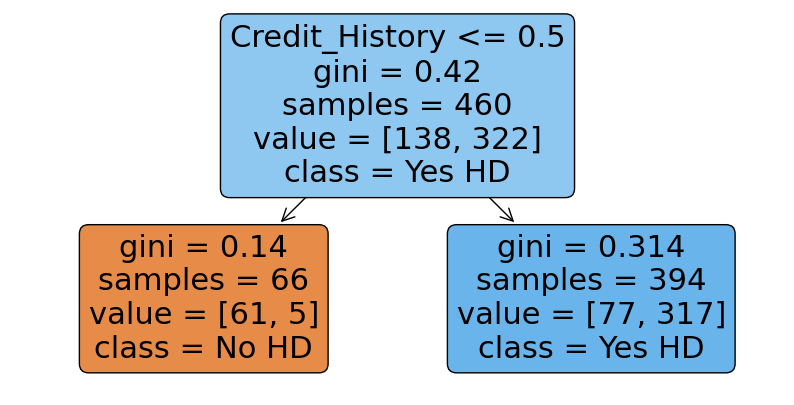

In [390]:
plt.figure(figsize=(10,5))
plot_tree(model5,filled=True,rounded=True,class_names=['No HD','Yes HD'],feature_names=X.columns.to_list())
plt.show()

# Random Forest

In [391]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print(f'y_train_pred = {y_train_pred}, y_train_pred = {y_train_pred}')

y_train_pred = [1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0
 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 0 1
 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1
 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1
 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0
 1 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1
 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1
 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1], y_train_pred = [1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 

In [392]:
y_train.shape

(460,)

In [393]:
y_train_pred.shape

(460,)

In [394]:
confusion_matrix(y_train,y_train_pred)

array([[138,   0],
       [  0, 322]], dtype=int64)

In [395]:
confusion_matrix(y_test,y_test_pred)

array([[21, 33],
       [10, 90]], dtype=int64)

In [396]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       322

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460



In [397]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.68      0.39      0.49        54
           1       0.73      0.90      0.81       100

    accuracy                           0.72       154
   macro avg       0.70      0.64      0.65       154
weighted avg       0.71      0.72      0.70       154



In [400]:
fpr,tpr,thresholds = roc_curve(y_train,y_train_pred)  # Calculate ROC curve

In [402]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [403]:
roc_auc = auc(fpr,tpr)      # Calculate AUC

In [404]:
print("AUC = ",roc_auc)

AUC =  1.0


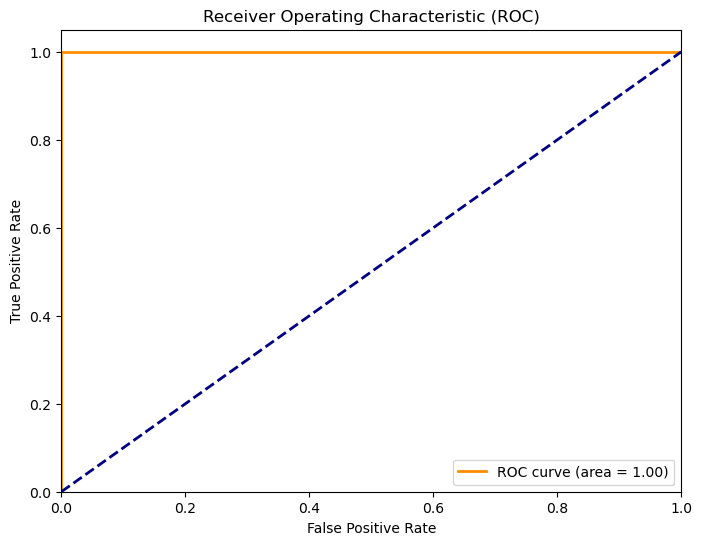

In [405]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()